Training Accuracy:  0.7587996836068815
Testing Accuracy:  0.6969157769869514
ROC AUC SCORE:  0.7926247913083865


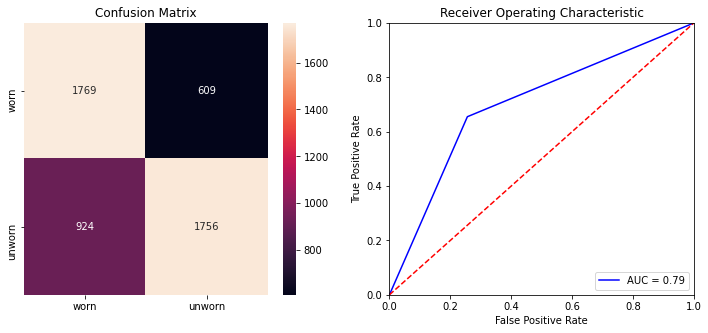

In [ ]:
knn_acc=ml_model(knn_model,X_train,X_test,y_train,y_test)

Training Accuracy:  0.6695175004943642
Testing Accuracy:  0.656781336496639
ROC AUC SCORE:  0.750864187263849


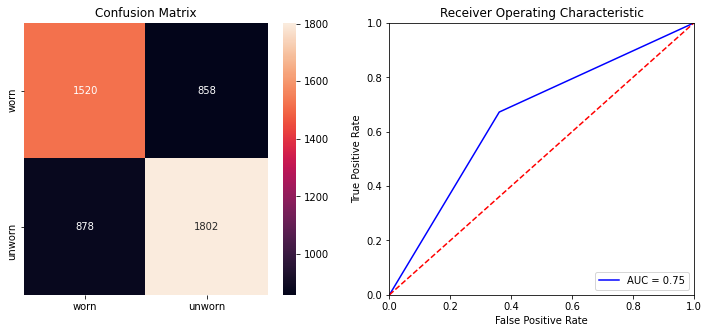

In [ ]:
xgb_acc=ml_model(xgb_model,X_train,X_test,y_train,y_test)

# Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import model_selection
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

import xgboost as xgb
from mlxtend.plotting import plot_decision_regions

In [ ]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [ ]:
path='drive/My Drive/Datasets/CNC/'
train=pd.read_csv(path+'train.csv')

In [ ]:
train.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


# Clubbing the 18 experiment files into one dataframe

In [ ]:
df_all=pd.DataFrame()

for i in range(1,19):
  if i<10:
    ex='0'+str(i)
  else:
    ex=str(i)
  experiment=pd.read_csv(path+"experiment_{}.csv".format(ex))
  experiment['No']=i
  df_all=pd.concat([df_all,experiment])

In [ ]:
df_all.shape

(25286, 49)

In [ ]:
df_all.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,1
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,1
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,1
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,1
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1


# Merging the result csv with dataframe

In [ ]:
df_all= pd.merge(df_all, train, on= 'No', how= 'left')

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25286 entries, 0 to 25285
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [ ]:
df_all.isnull().sum()

X1_ActualPosition               0
X1_ActualVelocity               0
X1_ActualAcceleration           0
X1_CommandPosition              0
X1_CommandVelocity              0
X1_CommandAcceleration          0
X1_CurrentFeedback              0
X1_DCBusVoltage                 0
X1_OutputCurrent                0
X1_OutputVoltage                0
X1_OutputPower                  0
Y1_ActualPosition               0
Y1_ActualVelocity               0
Y1_ActualAcceleration           0
Y1_CommandPosition              0
Y1_CommandVelocity              0
Y1_CommandAcceleration          0
Y1_CurrentFeedback              0
Y1_DCBusVoltage                 0
Y1_OutputCurrent                0
Y1_OutputVoltage                0
Y1_OutputPower                  0
Z1_ActualPosition               0
Z1_ActualVelocity               0
Z1_ActualAcceleration           0
Z1_CommandPosition              0
Z1_CommandVelocity              0
Z1_CommandAcceleration          0
Z1_CurrentFeedback              0
Z1_DCBusVoltag

# Visualization

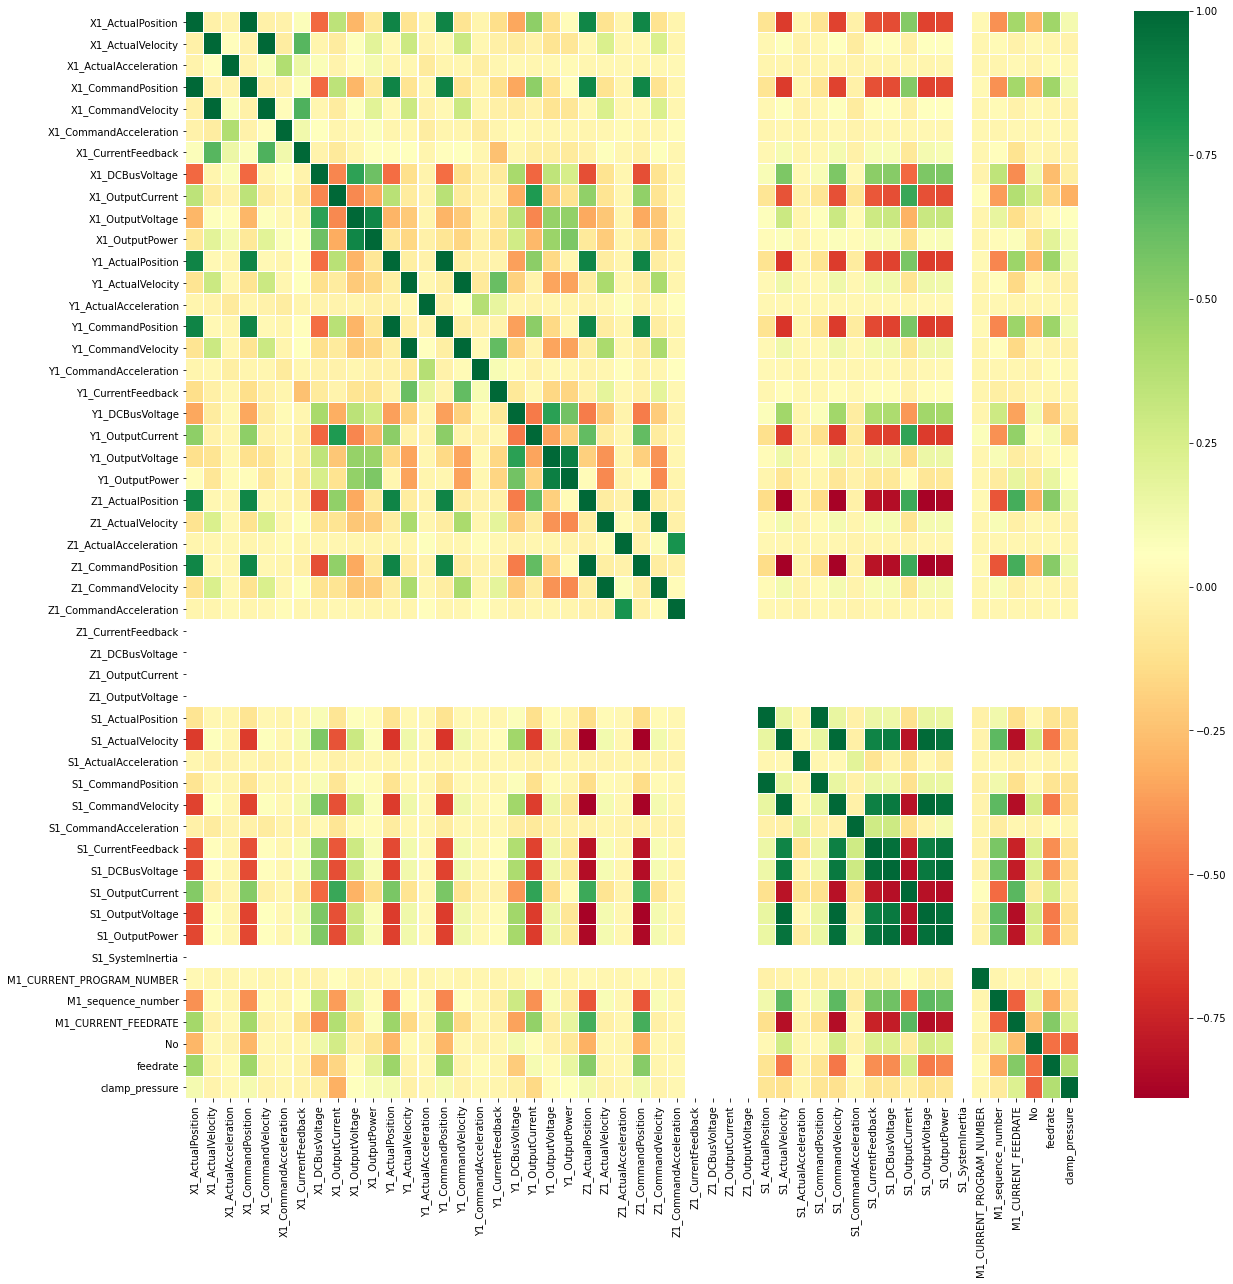

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_all.corr(), cmap='RdYlGn',linewidths=0.1,fmt='.2f')

# Converting object data to numeric data for calculation

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df_all=handle_non_numerical_data(df_all)

In [ ]:
df_all.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,0,1,0,6,4.0,0,1,2
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,9,1,0,6,4.0,0,1,2
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,9,1,0,6,4.0,0,1,2
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,9,1,0,6,4.0,0,1,2
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,9,1,0,6,4.0,0,1,2


In [ ]:
df_all['tool_condition'].value_counts(normalize=True)

1    0.526299
0    0.473701
Name: tool_condition, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n (0: unworn || 1: worn)')

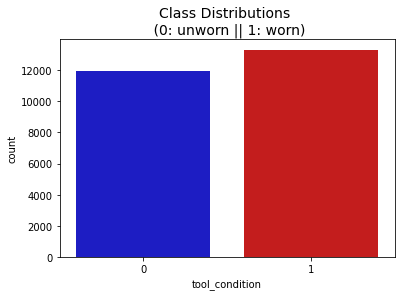

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('tool_condition', data=df_all, palette=colors)
plt.title('Class Distributions \n (0: unworn || 1: worn)', fontsize=14)

In [ ]:
df_all.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [ ]:
df_all.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.0,25286.0,25286.0,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,0.000610,99.230064,-0.422932,0.928832,99.226271,-0.412075,1.484158,-0.061681,6.398315e-02,325.862058,7.068352,0.000637,47.780638,-0.328759,-0.103658,47.778031,-0.328464,0.134118,0.0,0.0,0.0,0.0,-115.373082,38.986424,0.248602,-115.051536,38.650012,3.855889e-01,15.243948,6.692938e-01,322.784505,85.479195,0.127405,12.0,1.003441,47.345013,16.542039,5.682987,10.738235,0.0,7.123942,3.368168,0.526299,0.914538,1.673179
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,0.001565,29.244880,6.006439,85.074580,29.242802,6.004721,81.358073,4.469548,4.777806e-02,1.804164,8.601484,0.002098,34.255650,7.635223,66.442671,34.252517,7.637045,61.988683,0.0,0.0,0.0,0.0,1212.730873,23.491267,32.204079,1212.766136,23.758090,6.189738e+00,10.222419,4.332413e-01,4.293571,52.531863,0.080753,0.0,0.349055,43.826214,19.620219,2.787971,5.213285,0.0,6.167036,0.615639,0.499318,0.279574,0.625259
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,-0.006060,72.400000,-32.800000,-1260.000000,72.400000,-32.400000,-1000.000000,-27.800000,2.680000e-19,319.000000,0.000000,-0.004920,27.500000,-51.500000,-1260.000000,27.500000,-50.000000,-1000.000000,0.0,0.0,0.0,0.0,-2150.000000,-0.069000,-150.000000,-2150.000000,0.000000,-9.540000e-07,-8.280000,0.000000e+00,290.000000,0.000000,-0.002960,12.0,0.000000,0.000000,3.000000,0.000000,1.000000,0.0,3.000000,2.500000,0.000000,0.000000,0.000000
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,0.000000,77.500000,-0.075000,-18.800000,77.500000,0.000000,0.000000,-3.090000,2.190000e-02,325.000000,1.810000,0.000000,28.500000,0.000000,-6.250000,28.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1160.000000,0.002000,-15.900000,-1160.000000,0.000000,0.000000e+00,0.821000,2.790000e-19,320.000000,0.000000,0.000005,12.0,1.000000,2.000000,3.000000,4.000000,6.000000,0.0,3.000000,3.000000,0.000000,1.000000,2.000000
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,0.000174,90.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.146000,5.780000e-02,326.000000,4.

#Droping positional parameters and unrequired target variables

In [ ]:
drop_col=['X1_ActualPosition','Y1_ActualPosition','Z1_ActualPosition','S1_ActualPosition','Machining_Process','material','No','machining_finalized','passed_visual_inspection']
df_all.drop(columns=drop_col, inplace=True)

#Picking features by correlation threshold (Feature Selection)

In [ ]:
def correlation(dataset, threshold):
  col_corr=set()
  corr_mat=dataset.corr()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i,j]) > threshold:
        colname=corr_mat.columns[i]
        col_corr.add(colname)
  return col_corr

#Hyperparameter Tuning 

In [ ]:
def classify_with_best_model(clf, X_train, y_train, X_test, y_test, params=None, score=None):
  
  
    
    grid_search = model_selection.GridSearchCV(estimator=clf, 
                                               param_grid=params,
                                               cv=5, 
                                               scoring=score, 
                                               n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    print(y_pred.shape)
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
         
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    
    return grid_search.best_estimator_, df_predictions

#ML Modelling

In [ ]:
def ml_model(model, X_train, X_test, y_train, y_test):
     
    model.fit(X_train, y_train)
    
    prediction= model.predict(X_test)
    prediction_prob= model.predict_proba(X_test)[::, 1]
    
    print('Training Accuracy: ', model.score(X_train, y_train))
    print('Testing Accuracy: ', accuracy_score(y_test, prediction))
    print('ROC AUC SCORE: ', roc_auc_score(y_test, prediction_prob))

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    conf=confusion_matrix(y_test, prediction)
    sns.heatmap(conf,annot=True,fmt="0000.0f",xticklabels=["worn","unworn"],yticklabels=['worn','unworn'])
    plt.title('Confusion Matrix')

    fpr, tpr, threshold = roc_curve(y_test, prediction)
    roc_auc=roc_auc_score(y_test, prediction_prob)
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('Receiver Operating Characteristic')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return accuracy_score(y_test, prediction)

In [ ]:
corr_features = correlation(df_all, 0.8)
corr_features

{'M1_CURRENT_FEEDRATE',
 'S1_ActualVelocity',
 'S1_CommandVelocity',
 'S1_CurrentFeedback',
 'S1_DCBusVoltage',
 'S1_OutputCurrent',
 'S1_OutputPower',
 'S1_OutputVoltage',
 'X1_CommandVelocity',
 'X1_OutputPower',
 'Y1_CommandPosition',
 'Y1_CommandVelocity',
 'Y1_OutputPower',
 'Z1_CommandAcceleration',
 'Z1_CommandPosition',
 'Z1_CommandVelocity'}

# Scaling the dataset

In [ ]:
col=df_all.columns

In [ ]:
std_scaler=StandardScaler()
rob_scaler=RobustScaler()
num_df=pd.DataFrame(rob_scaler.fit_transform(df_all))

In [ ]:
num_df.shape

(25286, 46)

In [ ]:
num_df.columns=col

In [ ]:
num_df.head()

,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,feedrate,clamp_pressure,tool_condition
0,0.000000,0.000000,2.647059,0.000000,0.000000,0.119661,-0.925703,2.0,-0.574244,-0.299863,-0.142857,-0.166223,2.472727,0.0,0.000000,0.065609,-0.557855,2.0,-0.396154,-0.007484,0.0,0.000,3.314815,0.0,0.000000,0.0,0.0,0.0,0.0,-0.998146,0.007485,-0.123161,-1.0,0.0,-0.850878,-0.901261,1.000000,-0.983193,-0.896197,0.0,0.0,-0.469880,2.588235,1.0,1.0,-1.0
1,-4.800000,-6.216696,2.647059,-6.634146,-358.000000,-1.447525,2.393574,1.0,2.123522,7.360684,-113.142857,-19.946809,2.436364,-24.6,-647.000000,-2.445075,3.029522,-1.0,4.214103,24.892431,-20.3,-56.960,3.277778,-25.6,-674.000000,0.0,0.0,0.0,0.0,-0.998165,0.007485,-0.123161,-1.0,0.0,-0.888682,-0.901261,0.857143,-0.983193,-0.896204,0.0,0.0,-0.421687,2.588235,1.0,1.0,-1.0
2,-7.911111,-0.111012,2.529412,-8.731707,-0.000095,-1.120792,1.469880,1.0,3.082786,8.813675,-185.714286,0.000000,2.327273,-32.3,-0.000095,-1.324875,1.102138,1.0,5.701282,18.627609,-33.7,3.000,3.166667,-33.7,-0.000095,0.0,0.0,0.0,0.0,-0.998165,-0.013114,-0.123161,-1.0,0.0,-0.850878,-0.901261,0.857143,-0.983193,-0.896196,0.0,0.0,-0.385542,2.588235,1.0,1.0,-1.0
3,-8.000000,0.000000,2.411765,-8.731707,-0.000095,-0.770014,1.269076,0.0,3.043364,8.061538,-186.285714,-1.662234,2.218182,-32.3,-0.000095,-1.381636,1.332881,-1.0,5.470513,20.742233,-33.7,-0.500,3.055556,-33.7,0.000000,0.0,0.0,0.0,0.0,-0.998183,-0.007485,-0.123161,-1.0,0.0,-0.883654,-0.901261,0.857143,-0.983193,-0.896195,0.0,0.0,-0.385542,2.588235,1.0,1.0,-1.0
4,-7.955556,-0.333925,2.294118,-8.731707,0.000095,-0.712023,0.947791,1.0,3.069645,6.967521,-182.857143,3.670213,2.109091,-32.3,0.000095,-2.328214,1.957245,0.0,5.406410,26.671087,-33.6,1.504,2.907407,-33.7,0.000000,0.0,0.0,0.0,0.0,-0.998165,-0.005629,-0.123161,-1.0,0.0,-0.864752,-0.901261,0.857143,-0.983193,-0.896190,0.0,0.0,-0.385542,2.588235,1.0,1.0,-1.0


[0.03659032 0.03243617 0.05131223 0.00124555 0.03612875 0.00163649
 0.06604862 0.12326413 0.0176473  0.0515817  0.02569172 0.0401039
 0.38506681 0.06329157 0.04469514 0.02325961]


<function matplotlib.pyplot.show>

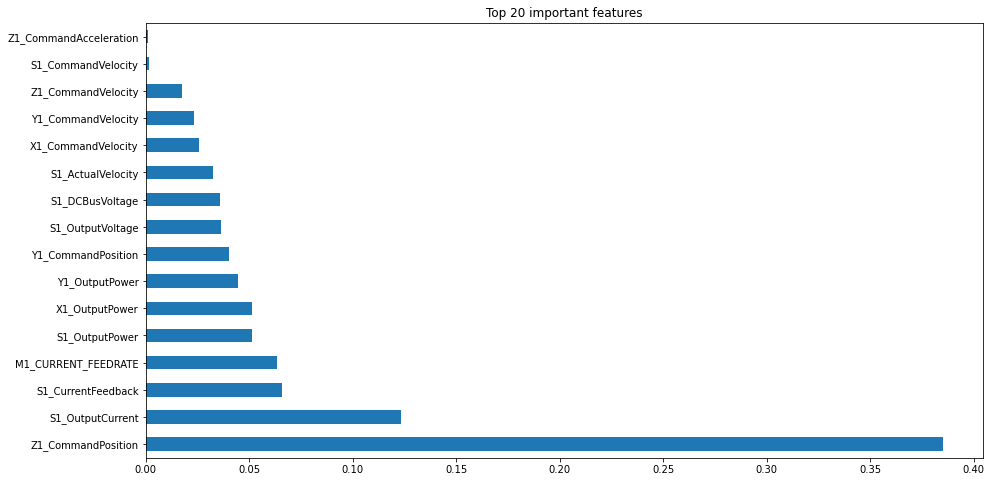

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
X=num_df[corr_features]
y=num_df['tool_condition']
model.fit(X,y)
print(model.feature_importances_) 
plt.figure(figsize=(15,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 important features")
plt.show

#train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(num_df[corr_features], df_all['tool_condition'], test_size= 0.2, random_state= 42)

#Logistic Regression

(5058,)
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Training Accuracy:  0.5635752422384813
Testing Accuracy:  0.56425464610518
ROC AUC SCORE:  0.5943775654946463


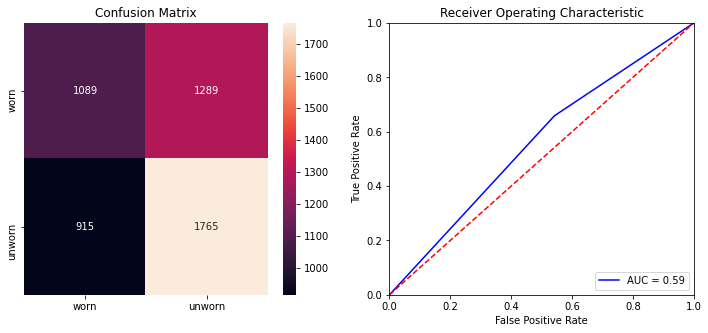

In [ ]:
lr_model=LogisticRegression(random_state=42)

params = {
    'C': [.01, 0.1, 1.0, 10], 
    'solver': ['liblinear', 'lbfgs']
}
score = 'roc_auc'

lr_model, model_pred=classify_with_best_model(lr_model,X_train,y_train,X_test,y_test,params=params,score=score)
print(lr_model)

lr_acc=ml_model(lr_model,X_train,X_test,y_train,y_test)

#Decision Tree

(5058,)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Training Accuracy:  0.9495748467470833
Testing Accuracy:  0.9470146302886516
ROC AUC SCORE:  0.9832796436237652


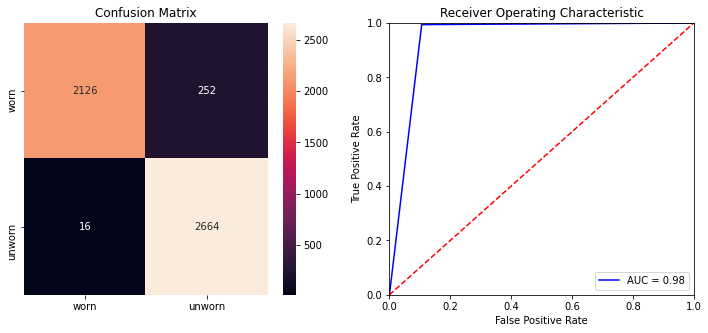

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [1, 5, 10, 20, 30, 40, 50, 100],
    'criterion': ['gini', 'entropy']
}
score = 'roc_auc'

dt_model, model_pred=classify_with_best_model(dt_model,X_train,y_train,X_test,y_test,params=params,score=score)
print(dt_model)

dt_acc=ml_model(dt_model,X_train,X_test,y_train,y_test)

In [ ]:
tool_condition='tool_condition'

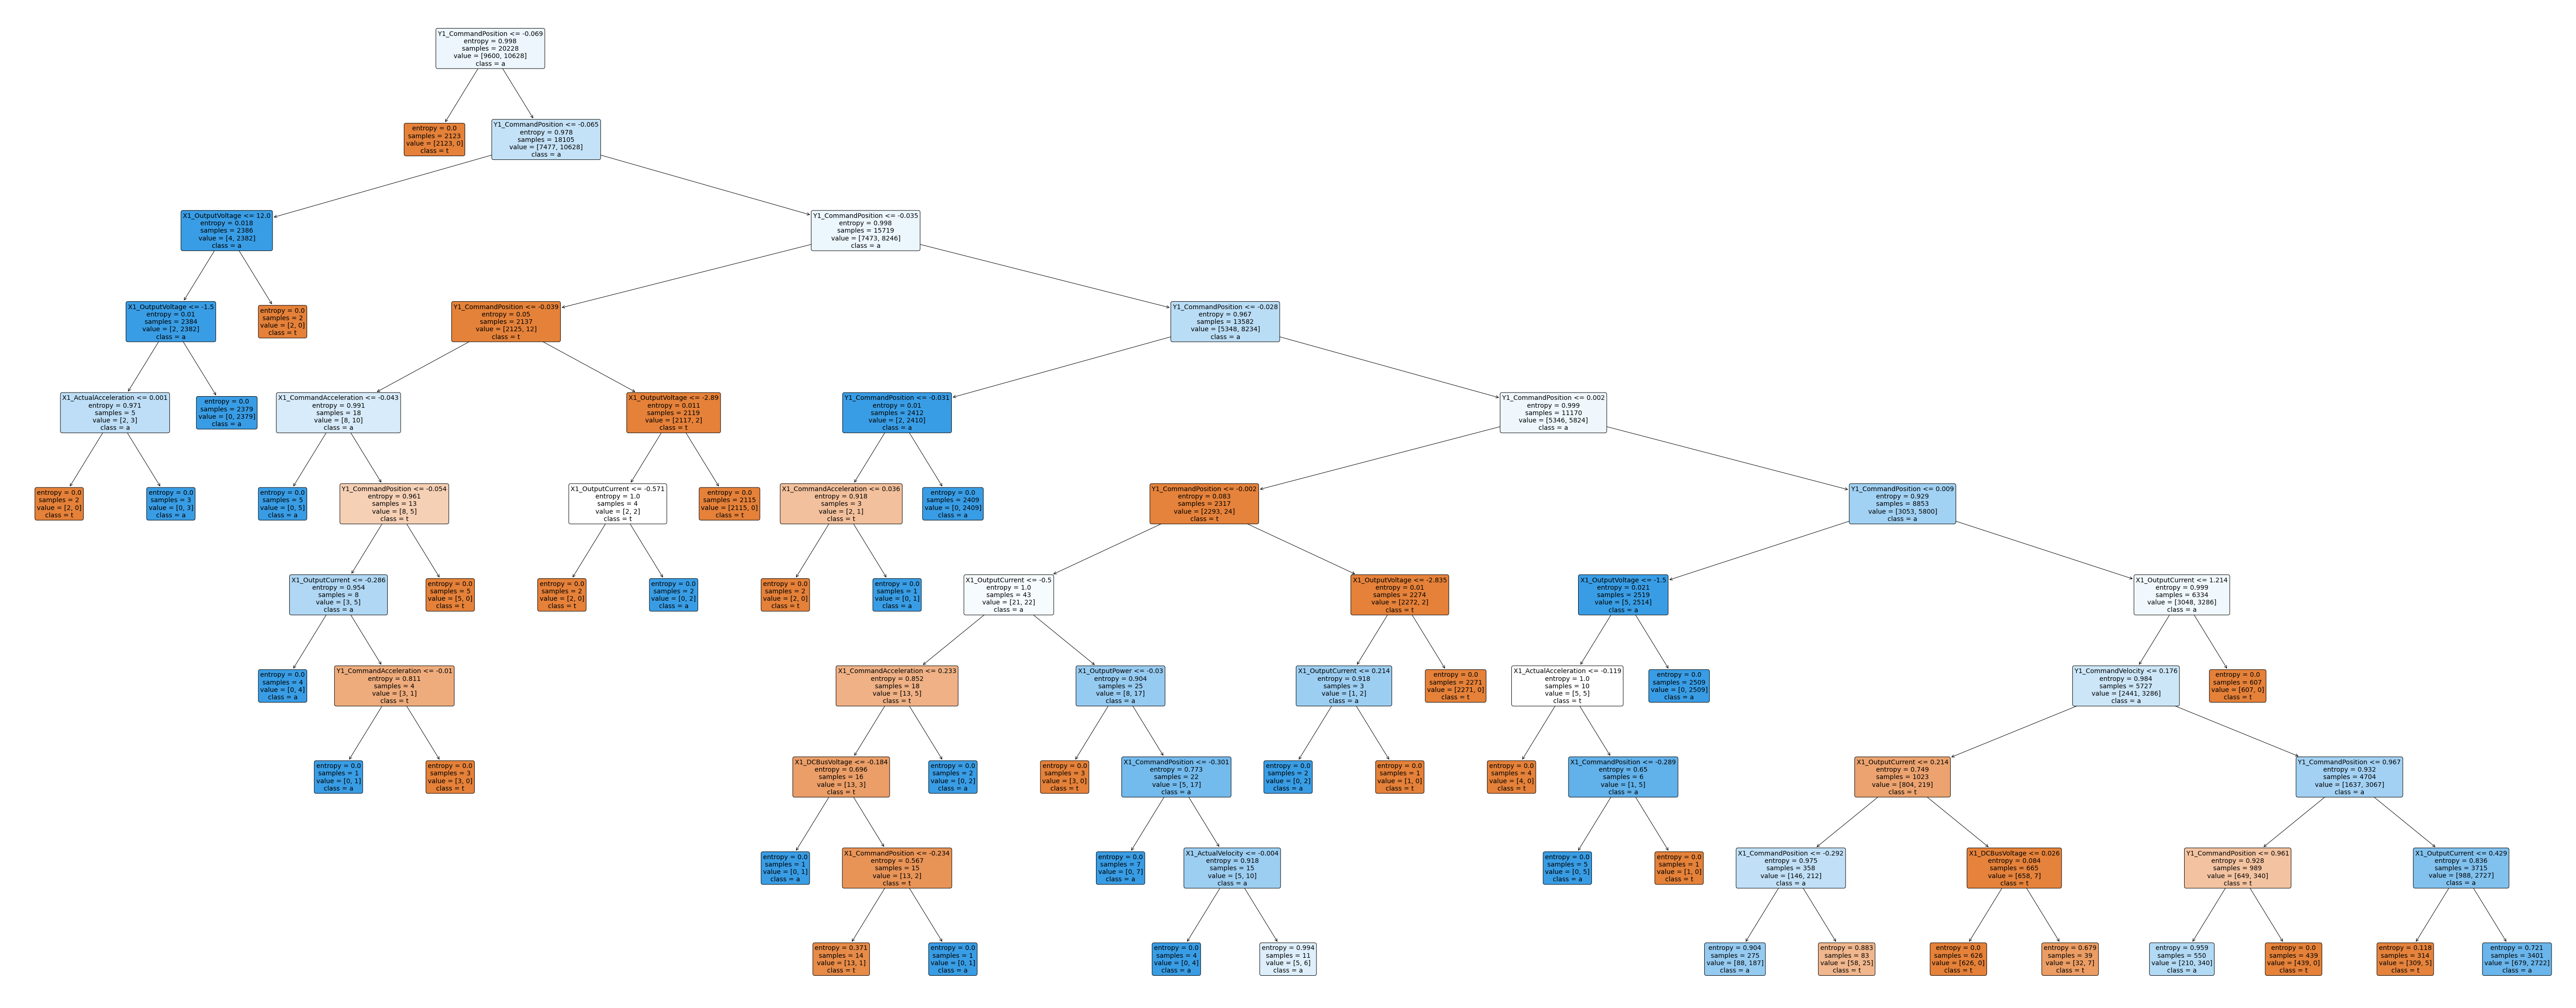

In [ ]:
plt.figure(figsize=(100,40))
a = plot_tree(dt_model,
              feature_names=df_all.columns,
              class_names='target',
              filled=True, 
              rounded=True, 
              fontsize=14)

#K-Neighbors

(5058,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='uniform')
Training Accuracy:  0.7456990310460747
Testing Accuracy:  0.6725978647686833
ROC AUC SCORE:  0.7733387049194731


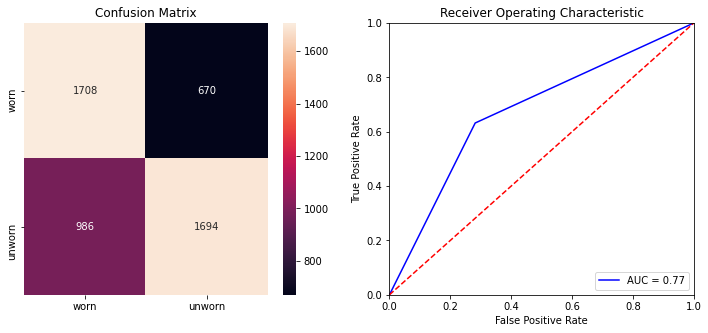

In [ ]:
knn_model = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12],
    'metric': ['euclidean', 'manhattan']
}
score = 'roc_auc'

knn_model, model_pred=classify_with_best_model(knn_model,X_train,y_train,X_test,y_test,params=params,score=score)
print(knn_model)

knn_acc=ml_model(knn_model,X_train,X_test,y_train,y_test)

#Random Forest

(5058,)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)
Training Accuracy:  1.0
Testing Accuracy:  0.9731119019375247
ROC AUC SCORE:  0.9971680704969685


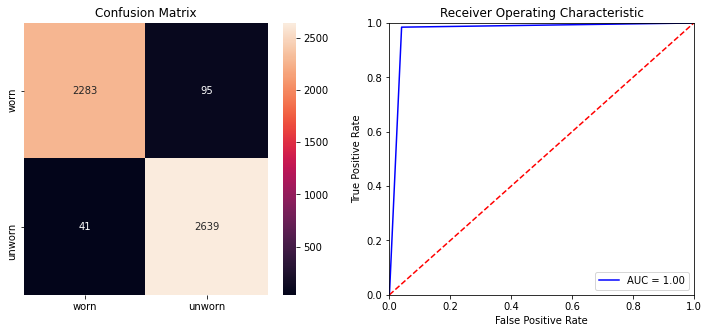

In [ ]:
rf_model= RandomForestClassifier(random_state= 2020)
params = {
    'n_estimators': [1, 5, 10, 20, 30, 40, 50, 100, 200]
}
score = 'roc_auc'
rf_model, model_pred=classify_with_best_model(rf_model,X_train,y_train,X_test,y_test,params=params,score=score)
print(rf_model)

rf_acc=ml_model(rf_model,X_train,X_test,y_train,y_test)

#XG Boost

(5058,)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training Accuracy:  0.9583745303539648
Testing Accuracy:  0.9584816132858838
ROC AUC SCORE:  0.994360383741511


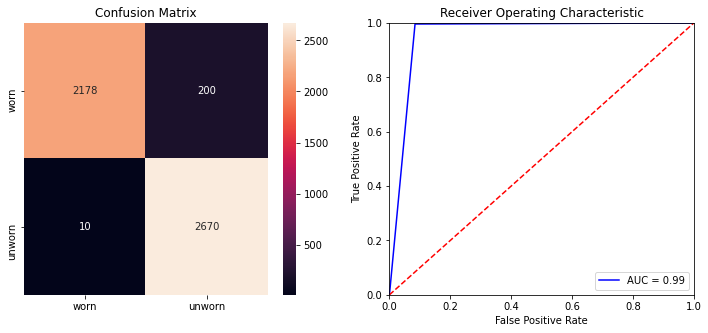

In [ ]:
xgb_model= xgb.XGBClassifier(random_state= 42)
params = {}
score = 'roc_auc'
xgb_model, model_pred=classify_with_best_model(xgb_model,X_train,y_train,X_test,y_test,params=params,score=score)
print(xgb_model)

xgb_acc=ml_model(xgb_model,X_train,X_test,y_train,y_test)

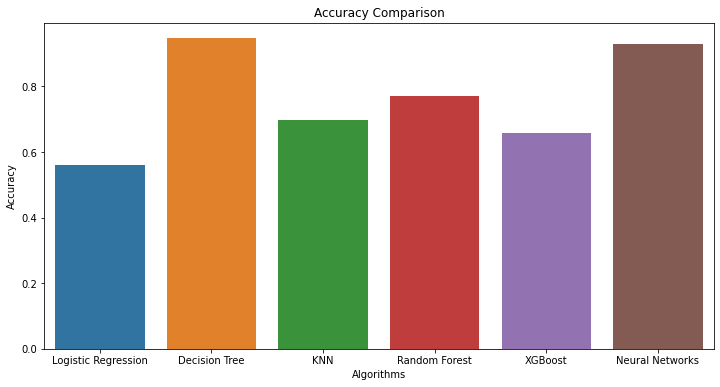

In [ ]:
nn_acc=0.93
Accuracy=[lr_acc, dt_acc, knn_acc, rf_acc, xgb_acc, nn_acc]
Models=['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'Neural Networks']
plt.figure(figsize=(12,6))
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(Models,Accuracy)


In [ ]:
'''
import pickle
import requests
import json
pickle.dump(rf_model, open('model.pkl','wb'))
'''

"\nimport pickle\nimport requests\nimport json\npickle.dump(rf_model, open('model.pkl','wb'))\n"

In [ ]:
X=num_df[corr_features]
y=df_all['tool_condition']

# PCA
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

PCA took 0.047 s


In [ ]:
pca = PCA(n_components=2, random_state=42)

In [ ]:
pca.n_components = 16
pca_data = pca.fit_transform(X)
retention_value = pca.explained_variance_ / np.sum(pca.explained_variance_);
cumulative_retention = np.cumsum(retention_value)

Text(0, 0.5, 'Retention value on scale of 1')

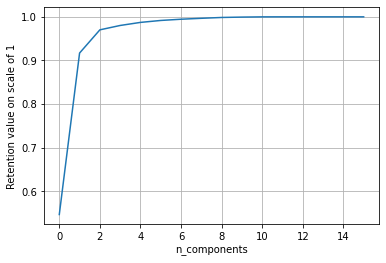

In [ ]:
plt.plot(cumulative_retention)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Retention value on scale of 1')

In [ ]:
import matplotlib.patches as mpatches
f, ax = plt.subplots(1, 1, figsize=(24,6))
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='unworn', linewidths=2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='worn', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [ ]:
print(X_reduced_pca)

[[ 1.40171578e+02  1.46595376e+00  2.16236117e+01 ...  2.62520792e-01
  -2.20072218e-02 -7.79329175e-01]
 [ 1.49055362e+02 -6.72464626e+02  1.07451072e+01 ...  4.63614140e-01
   9.17381074e-01  3.30487756e-01]
 [ 1.37889332e+02  1.37551378e+00  1.46958071e+01 ...  1.46679755e+00
   1.65245902e+00 -1.02639787e-01]
 ...
 [-5.18081099e+01 -8.27359076e-01 -6.46309336e+00 ...  2.16506454e+00
   1.11638232e-01 -2.06214410e+00]
 [-5.06923222e+01 -8.03067697e-01 -6.82799955e+00 ... -3.38157987e-01
  -6.62784107e-02 -1.55345204e+00]
 [-5.11029849e+01 -8.13106601e-01 -6.39937439e+00 ... -2.70295345e+00
  -6.71249935e-01  8.33450151e-01]]


In [ ]:
reduced_df=pd.DataFrame(X_reduced_pca)
reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,140.171578,1.465954,21.623612,9.994862,-1.215198,-1.020962,-0.007491,1.406601,0.262521,-0.022007,-0.779329
1,149.055362,-672.464626,10.745107,-1.461810,-34.299217,-6.253902,-7.303330,-4.665044,0.463614,0.917381,0.330488
2,137.889332,1.375514,14.695807,-4.474323,-44.550890,-17.107358,-8.804034,-5.732927,1.466798,1.652459,-0.102640
3,135.781066,1.398049,11.147297,-5.078525,-44.516761,-16.395181,-8.636024,-5.930118,0.814604,1.387237,0.042644
4,133.107508,1.424684,7.252035,-5.822700,-44.741265,-14.974779,-8.436354,-5.768691,1.178436,1.237800,0.027277


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_reduced_pca, df_all['tool_condition'], test_size= 0.2, random_state= 42)

Training Accuracy:  0.5520071188451651
Testing Accuracy:  0.5591142744167655
ROC AUC SCORE:  0.6164859313608576


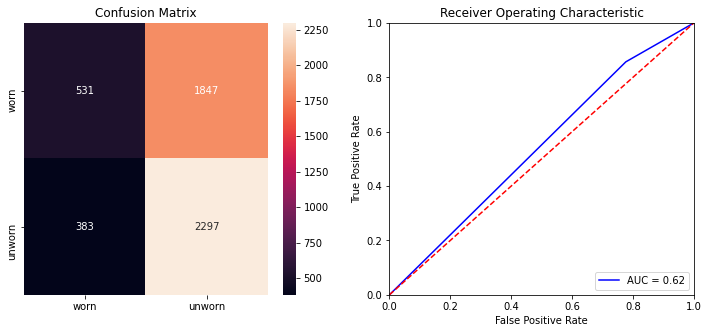

In [ ]:
svc_clf = SVC(probability=True, random_state=42)
svc_acc=ml_model(svc_clf, X_train,X_test,y_train,y_test)

Training Accuracy:  0.5548744314811153
Testing Accuracy:  0.5614867536575722
ROC AUC SCORE:  0.5838761407428794


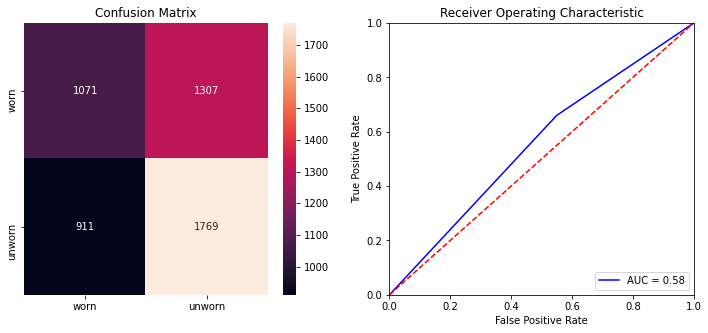

In [ ]:
lr_acc=ml_model(lr_model,X_train,X_test,y_train,y_test)

Training Accuracy:  0.999604508601938
Testing Accuracy:  0.7712534598655595
ROC AUC SCORE:  0.8658254145588291


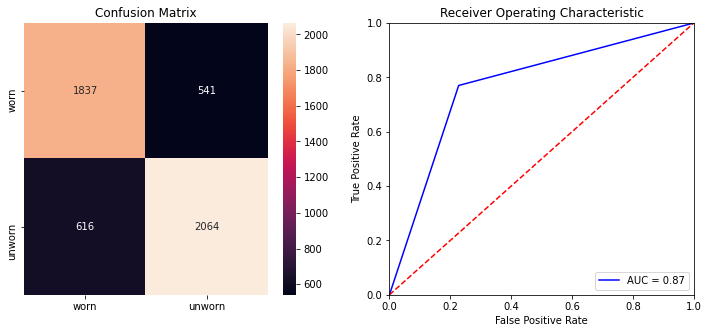

In [ ]:
rf_acc=ml_model(rf_model,X_train,X_test,y_train,y_test)